<a href="https://colab.research.google.com/github/madhuselvaraj/VGG16_Model/blob/master/keras_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [0]:
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from tensorflow.keras.layers import Activation, Dense,Flatten,Dropout
from tensorflow.keras import models

In [0]:
from tensorflow.keras.optimizers import RMSprop

Upload *kaggle.json* file in google colab in order to download the dataset from kaggle

In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jul  1 04:27 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

Download **Dog vs Cat** dataset from kaggle *competitions*

In [11]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 95% 257M/271M [00:04<00:00, 37.5MB/s]
100% 271M/271M [00:04<00:00, 69.0MB/s]
 99% 537M/544M [00:05<00:00, 138MB/s]
100% 544M/544M [00:05<00:00, 100MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 114MB/s]


Unzip *train.zip* to retrive the images

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("train.zip", 'r')
zip_ref.extractall()
#zip_ref = zipfile.ZipFile("test.zip", 'r')
#zip_ref.extractall()
zip_ref.close()
print(os.listdir("/content"))
#print(zip_ref.namelist())

Save the path of training images.

NOTE** Training images have both cat and dog images.we have to split it and label it as cat and dog

In [13]:
train_images = os.path.join("/content/train/")
print(len(os.listdir(train_images)))

25000


In [0]:
train_image_names = os.listdir(train_images)

create seperate training directories for cat and dog

In [0]:
os.mkdir("/content/Training")
os.mkdir("/content/Training/dogs/")
os.mkdir("/content/Training/cats/")

split images into:

Training

          |
          ----->cats
          |
          ----->dogs

In [0]:
for i in range(6000):
  
  if (train_image_names[i][0]+train_image_names[i][1]+train_image_names[i][2]) == "cat" and len(os.listdir(os.path.join("/content/Training/cats/"))) <= 2500:
    
    image = Image.open(train_images+'/'+train_image_names[i])
    image.save(os.path.join("/content/Training/cats/",train_image_names[i]))
    
  if (train_image_names[i][0]+train_image_names[i][1]+train_image_names[i][2]) == "dog" and len(os.listdir(os.path.join("/content/Training/dogs/"))) <= 2500:
    
    image = Image.open(train_images+'/'+train_image_names[i])
    image.save(os.path.join("/content/Training/dogs/",train_image_names[i]))

i considered 2501 images in each class.

In [17]:
print(len(os.listdir(os.path.join("/content/Training/cats/"))))
print(len(os.listdir(os.path.join("/content/Training/dogs/"))))

2501
2501


create seperate Validation directories for cat and dog

In [0]:
os.mkdir("/content/Validation")
os.mkdir("/content/Validation/dogs/")
os.mkdir("/content/Validation/cats/")

split images into:

Validation

          |
          ----->cats
          |
          ----->dogs

In [0]:
for i in range(6000,7500):
  
  if (train_image_names[i][0]+train_image_names[i][1]+train_image_names[i][2]) == "cat" and len(os.listdir(os.path.join("/content/Validation/cats/"))) <= 500:
    
    image = Image.open(train_images+'/'+train_image_names[i])
    image.save(os.path.join("/content/Validation/cats/",train_image_names[i]))
    
  if (train_image_names[i][0]+train_image_names[i][1]+train_image_names[i][2]) == "dog" and len(os.listdir(os.path.join("/content/Validation/dogs/"))) <= 500:
    
    image = Image.open(train_images+'/'+train_image_names[i])
    image.save(os.path.join("/content/Validation/dogs/",train_image_names[i]))

i considered 501 images in each class for validation.

In [20]:
print(len(os.listdir(os.path.join("/content/Validation/cats/"))))
print(len(os.listdir(os.path.join("/content/Validation/dogs/"))))

501
501


create a model VGG16 in keras of 2 classes with a dropout of 0.5 in layer FC1 and FC2.

In [21]:
model_conv = models.Sequential()
model_conv.add(VGG16(include_top = False,weights = None,input_shape = (224, 224, 3)))

W0701 04:41:54.412847 140598614456192 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model_conv.add(Flatten())
model_conv.add(Dense(4096, activation='relu',name = 'FC1'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(4096, activation='relu',name = 'FC2'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(2, activation='softmax',name = "out_softmax_layer"))

In [23]:
model_conv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
FC2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
out_softmax_layer (Dense)    (None, 2)                 8

preprocessing images of training and validation sets. 

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Training',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/Validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 5002 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


Compipling the model

In [0]:
model_conv.compile(optimizer = RMSprop(lr=0.00001), loss="categorical_crossentropy", metrics=['accuracy'])

training the model.

In [28]:
fit_model = model_conv.fit_generator(
        train_generator,
        steps_per_epoch=31,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=6)

Epoch 1/50
31/31 [==============================] - 17s 560ms/step - loss: 0.2174 - acc: 0.9093 - val_loss: 0.2762 - val_acc: 0.9115
Epoch 2/50
31/31 [==============================] - 17s 539ms/step - loss: 0.2361 - acc: 0.9072 - val_loss: 0.3301 - val_acc: 0.8594
Epoch 3/50
31/31 [==============================] - 17s 550ms/step - loss: 0.2253 - acc: 0.9052 - val_loss: 0.4063 - val_acc: 0.8594
Epoch 4/50
31/31 [==============================] - 17s 553ms/step - loss: 0.2362 - acc: 0.9052 - val_loss: 0.3234 - val_acc: 0.8646
Epoch 5/50
31/31 [==============================] - 17s 550ms/step - loss: 0.2292 - acc: 0.8982 - val_loss: 0.3339 - val_acc: 0.8594
Epoch 6/50
31/31 [==============================] - 17s 553ms/step - loss: 0.2243 - acc: 0.9083 - val_loss: 0.3469 - val_acc: 0.8646
Epoch 7/50
31/31 [==============================] - 17s 554ms/step - loss: 0.2354 - acc: 0.9042 - val_loss: 0.3336 - val_acc: 0.8594
Epoch 8/50
31/31 [==============================] - 17s 555ms/step - 

we got a *training accuracy* = 0.9204 and *validation accuracy* = 0.8906.  Inorder to achieve a minimum validation loss ,*more dataset* or more *epochs* may help.


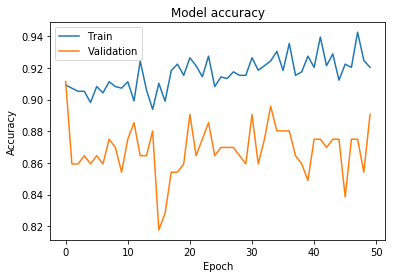

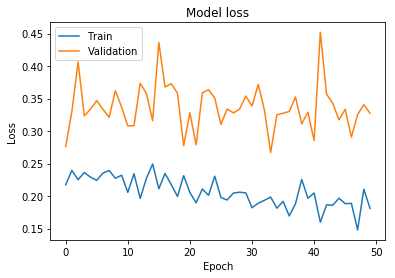

In [30]:
plt.plot(fit_model.history['acc'])
plt.plot(fit_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation loss values
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Predict an test image

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [40]:
from google.colab import files
uploaded = files.upload()

Saving cat_01.jpg to cat_01.jpg


Its a Cat


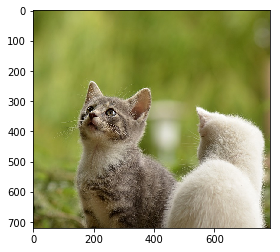

In [41]:
#load an image with shape(224,224)
image = load_img("cat_01.jpg", target_size=(224, 224))

#converting an image to array
image = img_to_array(image)

#reshape it into (1,224,224,3)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#preprocessing the image
image = preprocess_input(image)

#predicting the output
label = model_conv.predict(image)

if label[0][0] == 1:
  print("Its a Cat")
if label[0][1] == 1:
  print("Its a Dog")
img = Image.open("cat_01.jpg")
plt.imshow(img)